# Japan Used Cars Price Prediction (Practice Project -5)

Problem Statement:
    
Cars' data was scraped from tc-v.com and it included Information about Japan's largest online used car marketplace. Ten features were assembled for each car in the dataset.



In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [3]:
df=pd.read_csv('Japan_used_car.csv')
df

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline
...,...,...,...,...,...,...,...,...,...,...,...
2313,2331,1400,toyota,vitz,2009,121000,996,at,2wd,rhd,gasoline
2314,2332,1400,toyota,estima,2003,101000,3000,at,2wd,rhd,gasoline
2315,2333,1400,subaru,r2,2005,101000,660,cvt,2wd,rhd,gasoline
2316,2334,1400,honda,z,2000,170000,660,at,4wd,rhd,gasoline


In [4]:
df.shape

(2318, 11)

The dataset is having 2318 columns and 11 rows

In [5]:
df.dtypes

id                  int64
price               int64
mark               object
model              object
year                int64
mileage             int64
engine_capacity     int64
transmission       object
drive              object
hand_drive         object
fuel               object
dtype: object

All columns have correct data types

In [6]:
df.columns

Index(['id', 'price', 'mark', 'model', 'year', 'mileage', 'engine_capacity',
       'transmission', 'drive', 'hand_drive', 'fuel'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2318 non-null   int64 
 1   price            2318 non-null   int64 
 2   mark             2318 non-null   object
 3   model            2318 non-null   object
 4   year             2318 non-null   int64 
 5   mileage          2318 non-null   int64 
 6   engine_capacity  2318 non-null   int64 
 7   transmission     2318 non-null   object
 8   drive            2318 non-null   object
 9   hand_drive       2318 non-null   object
 10  fuel             2318 non-null   object
dtypes: int64(5), object(6)
memory usage: 199.3+ KB


No null values in dataset.

In [8]:
df.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


As we can see column ID,Mark, Model have no significance, so we can drop them.

In [9]:
# Checking for Null values
df.isnull().sum()

id                 0
price              0
mark               0
model              0
year               0
mileage            0
engine_capacity    0
transmission       0
drive              0
hand_drive         0
fuel               0
dtype: int64

There is no null value in dataset.

In [10]:
df.describe()

,id,price,year,mileage,engine_capacity
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,1169.047023,971.522433,2005.972390,100013.194996,1507.010785
std,674.460724,288.673112,3.698863,52512.478883,549.585170
min,0.000000,80.000000,1979.000000,2000.000000,9.000000
25%,583.250000,776.000000,2004.000000,67000.000000,1300.000000
50%,1168.500000,1000.000000,2006.000000,94000.000000,1490.000000
75%,1753.750000,1213.000000,2009.000000,124000.000000,1800.000000
max,2335.000000,1400.000000,2015.000000,790000.000000,12340.000000


In [13]:
df['transmission'].unique()

array(['at', 'mt', 'cvt'], dtype=object)

In [14]:
df['drive'].unique()

array(['2wd', '4wd', 'awd'], dtype=object)

In [15]:
df['fuel'].unique()

array(['gasoline', 'diesel', 'hybrid', 'lpg', 'cng'], dtype=object)

In [16]:
#Dropping model and mark column

df=df.drop(columns=['id','mark','model'],axis=1)
df.head()

,price,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,80,2003,80000,1240,at,2wd,rhd,gasoline
1,110,2010,53000,1200,at,2wd,rhd,gasoline
2,165,2005,47690,2000,at,2wd,rhd,gasoline
3,190,2008,130661,1990,at,2wd,rhd,gasoline
4,190,2006,66300,660,at,2wd,rhd,gasoline


# Data Visualization

gasoline    2290
diesel        18
lpg            7
hybrid         2
cng            1
Name: fuel, dtype: int64


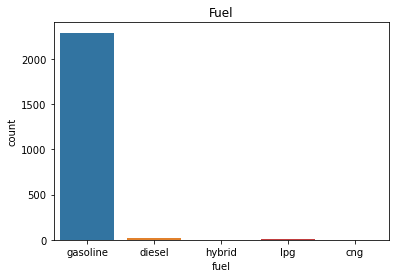

In [19]:
#for Categorical columns
# countplot for fuel

ax = sns.countplot(x='fuel', data=df)
print(df['fuel'].value_counts())
plt.title("Fuel")
plt.show()

We can see that mostly cars are gasoline cars. 

at     2171
mt      117
cvt      30
Name: transmission, dtype: int64


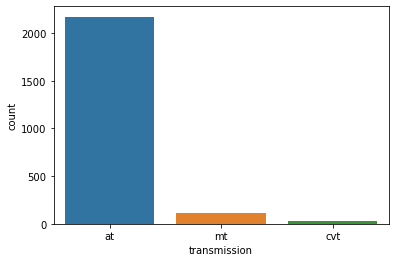

In [20]:
# count plot fortransmission
ax=sns.countplot(x='transmission',data=df)
print(df['transmission'].value_counts())

We can see that mostly cars have Automatic transmission.

2wd    2121
4wd     192
awd       5
Name: drive, dtype: int64


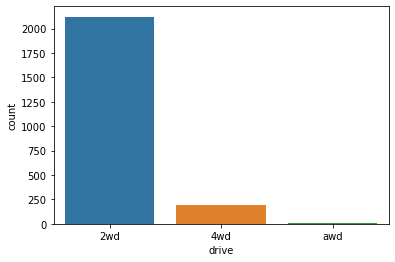

In [21]:
# countplot for drive
ax=sns.countplot(x='drive',data=df)
print(df['drive'].value_counts())

Mostly cars are 2wd.

rhd       2301
lhd         16
center       1
Name: hand_drive, dtype: int64


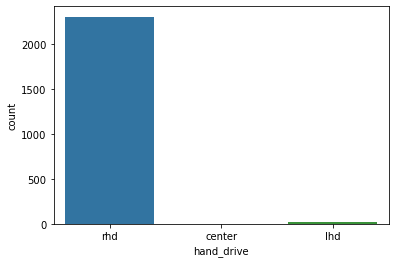

In [23]:
# countplot for hand_drive

ax = sns.countplot(x='hand_drive', data=df)
print(df['hand_drive'].value_counts())

Right hand drive cars in higher numbers.

<AxesSubplot:xlabel='price', ylabel='Density'>

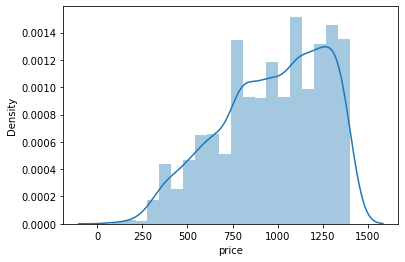

In [24]:
# For price

sns.distplot(df['price'])

We find that Label variable is Right Skewed

<AxesSubplot:xlabel='transmission', ylabel='price'>

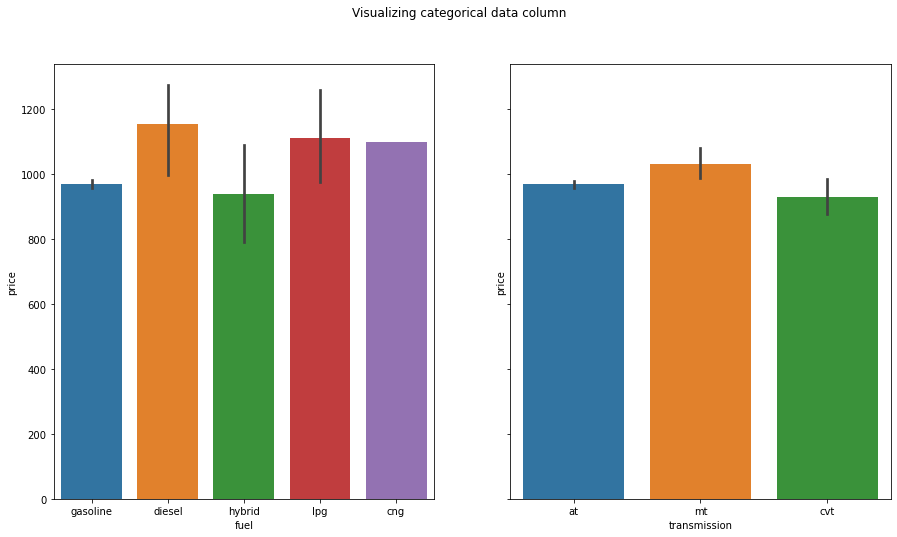

In [31]:
price = df['price']
trans = df['transmission']
fuel_type = df['fuel']


fig,axes = plt.subplots(1,2,figsize=(15,8),sharey=True)
fig.suptitle('Visualizing categorical data column')
sns.barplot(x=fuel_type,y=price,ax=axes[0])
sns.barplot(x=trans,y=price,ax=axes[1])

<AxesSubplot:xlabel='hand_drive', ylabel='price'>

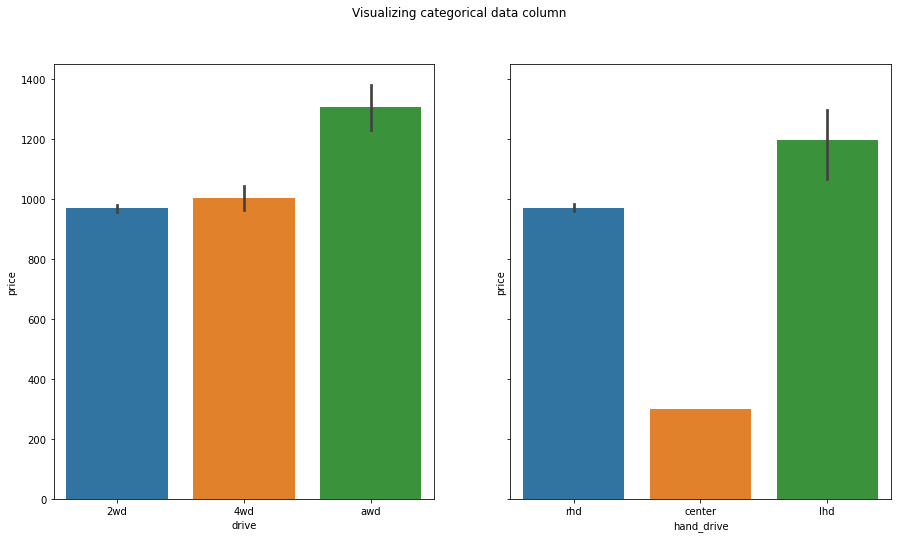

In [27]:
dr = df['drive']
hd = df['hand_drive']

fig,axes = plt.subplots(1,2,figsize=(15,8),sharey=True)
fig.suptitle('Visualizing categorical data column')
sns.barplot(x=dr,y=price,ax=axes[0])
sns.barplot(x=hd,y=price,ax=axes[1])


In [32]:
#Enocoding  transmission ,fuel,hand_drive using label encoder

list1=['transmission','fuel','hand_drive']

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in list1:
    df[col]=le.fit_transform(df[col])
df.head()

,price,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,80,2003,80000,1240,0,2wd,2,2
1,110,2010,53000,1200,0,2wd,2,2
2,165,2005,47690,2000,0,2wd,2,2
3,190,2008,130661,1990,0,2wd,2,2
4,190,2006,66300,660,0,2wd,2,2


Encoding data with LabelEncoder as data are categorically nominal.

In [33]:
#Encoding drive column with Ordinal Encoder

cat=['awd','4wd','2wd']

from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder(categories=[cat])

list2=['drive']

for col in list2:
    df[col]=enc.fit_transform(df[col].values.reshape(-1,1))
df.head()

,price,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,80,2003,80000,1240,0,2.0,2,2
1,110,2010,53000,1200,0,2.0,2,2
2,165,2005,47690,2000,0,2.0,2,2
3,190,2008,130661,1990,0,2.0,2,2
4,190,2006,66300,660,0,2.0,2,2


Enocoding drive column with ordial encoder.

# Checking For skewness

In [34]:
df.skew().sort_values()

hand_drive        -12.811470
drive              -3.193137
year               -0.845917
price              -0.466780
mileage             3.089142
transmission        3.820441
engine_capacity     4.038892
fuel                4.146744
dtype: float64

All the features are having skewness but HandDrive column is highly skewed.

# Correlation with target columns and features

In [35]:
df.corr()['price'].sort_values()

year              -0.211092
drive             -0.046591
hand_drive        -0.036473
fuel              -0.016337
mileage            0.021581
transmission       0.043679
engine_capacity    0.173748
price              1.000000
Name: price, dtype: float64

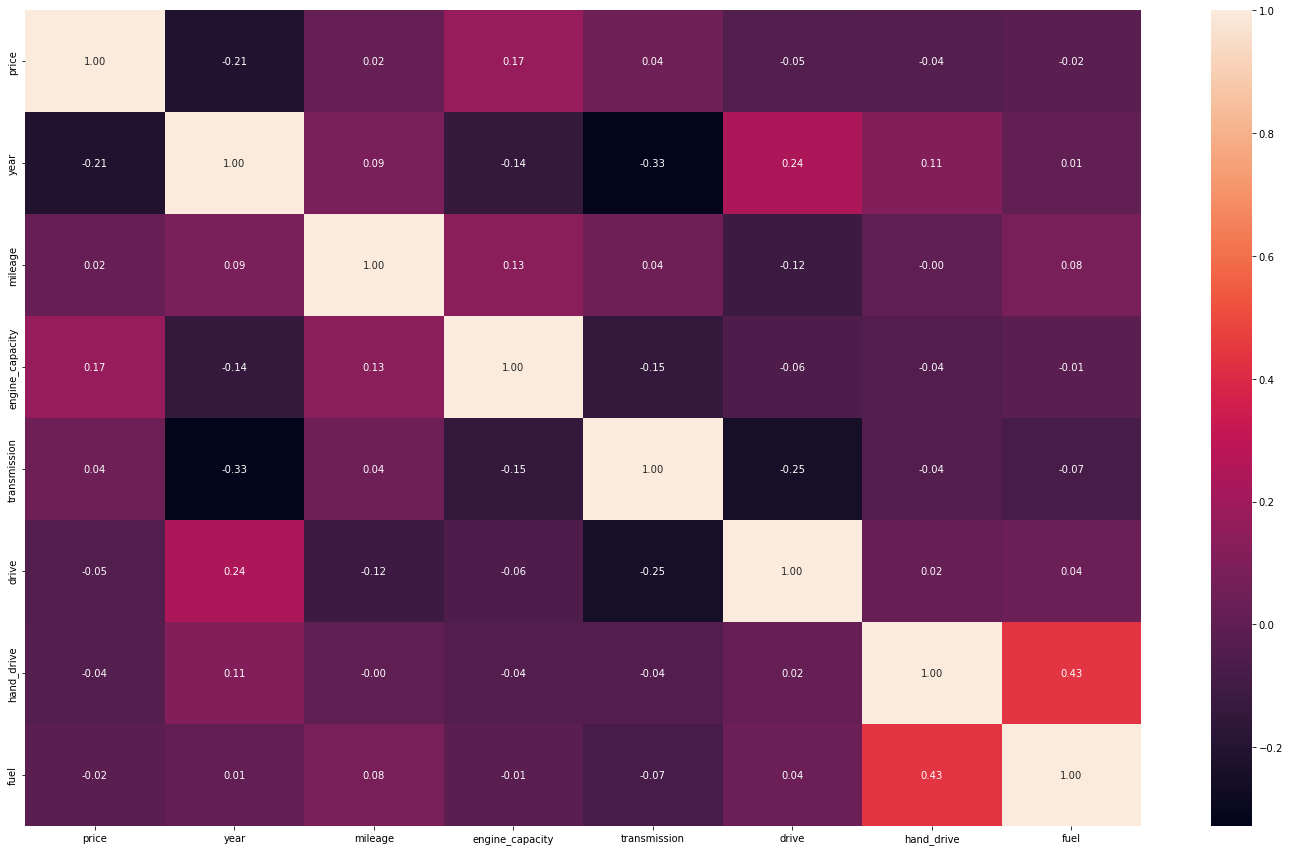

In [36]:
# heatmap

plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True,fmt="0.2f")
plt.show()    

year column have highest relationship with target

# Checking the columns which are related to target.

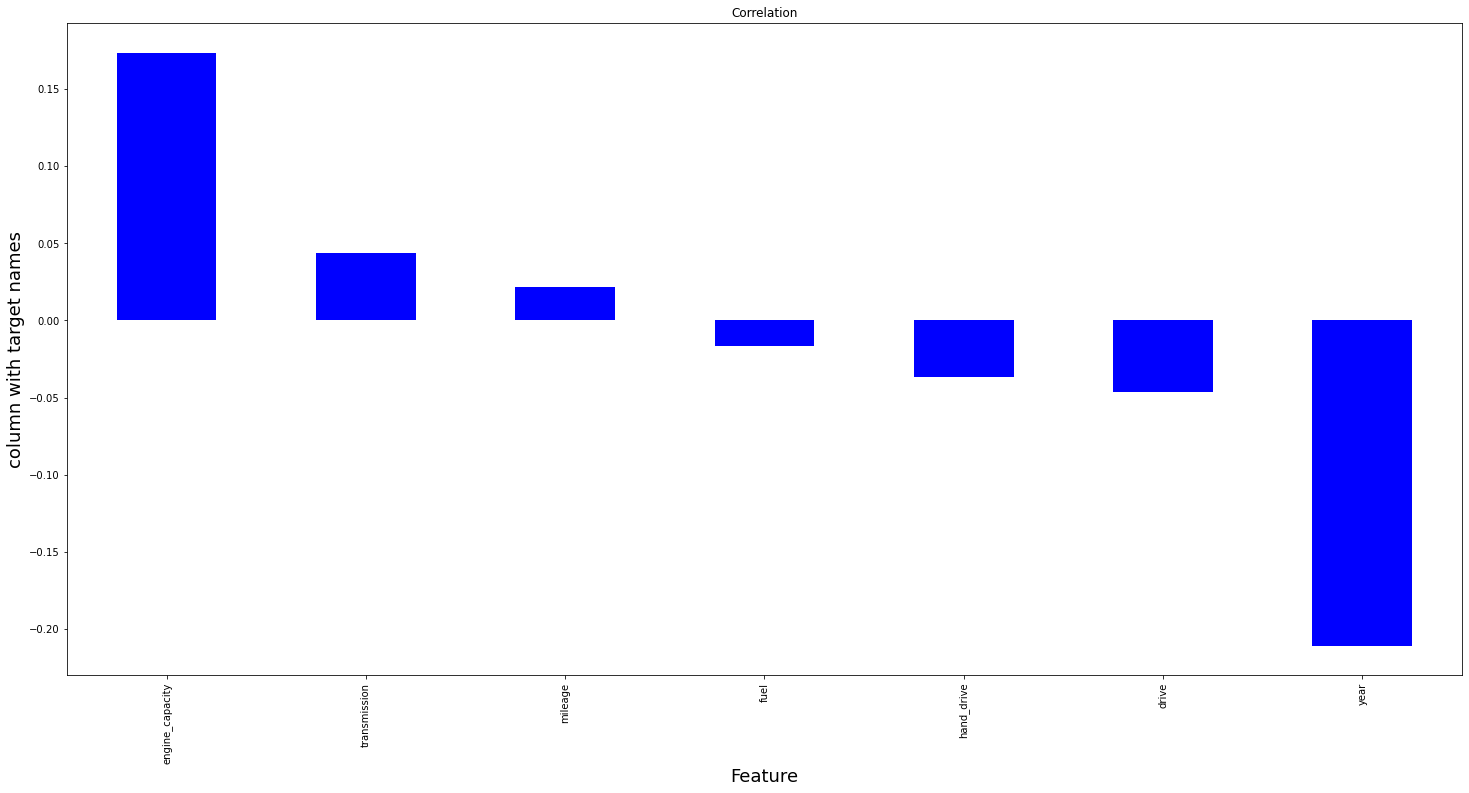

In [39]:
plt.figure(figsize=(25,12))
df.corr()['price'].sort_values(ascending=False).drop(['price']).plot(kind='bar',color='b')
plt.xlabel('Feature',fontsize=2)
plt.ylabel('column with target names',fontsize=18)
plt.title('Correlation')
plt.show()

Engine_capacity, transmission ,mileage are positively related to target.

Fuel, hand_drive, drive and year are negatively related to target.

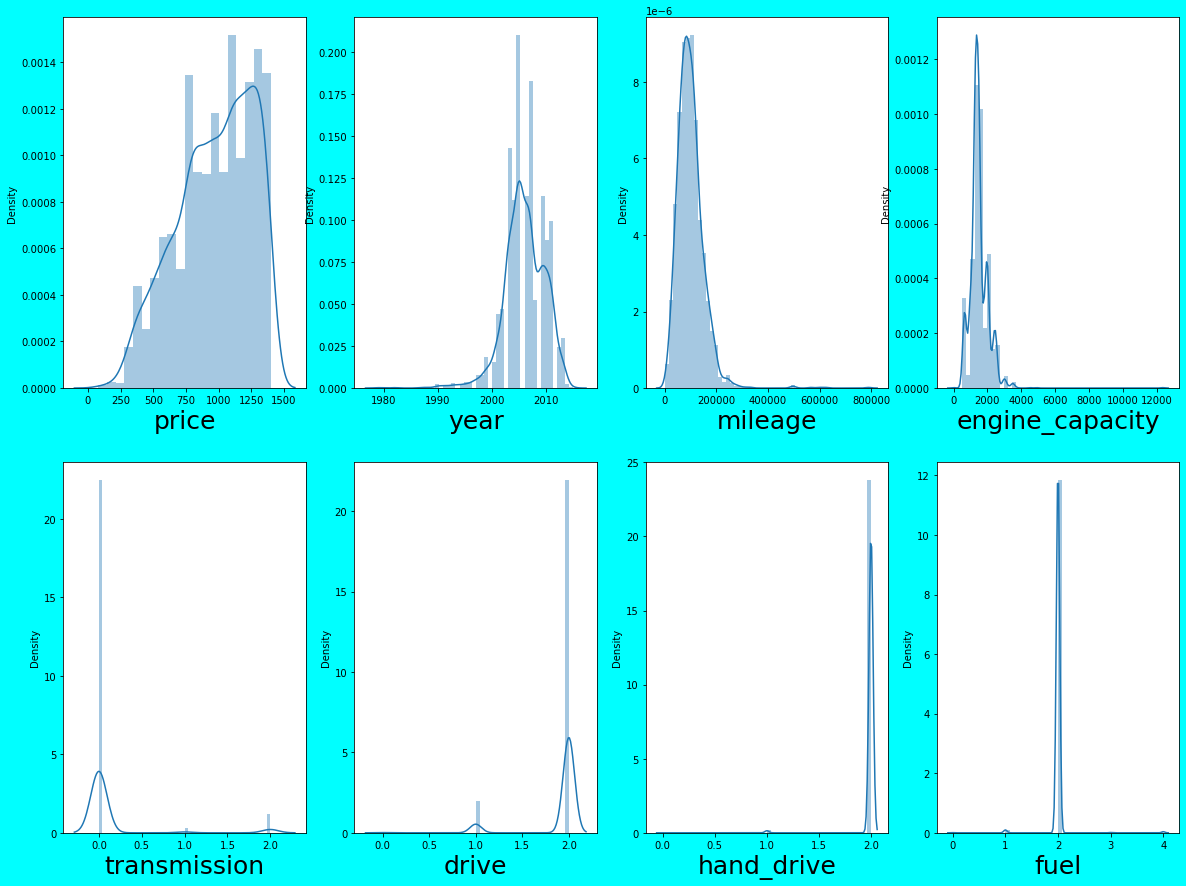

In [42]:
# Checking distribution for every column

plt.figure(figsize=(20,15), facecolor='cyan')
plotnumber = 1

for column in df:
    if plotnumber <=8:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber += 1
plt.show()

Features such as year, mileage,engine_capacity has skewness which has to be considered.

# Checking outliers

<AxesSubplot:>

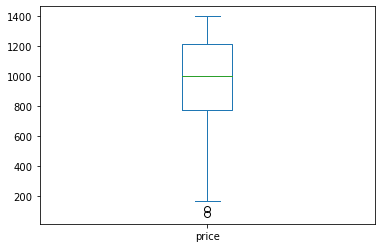

In [43]:
df['price'].plot.box()

<AxesSubplot:>

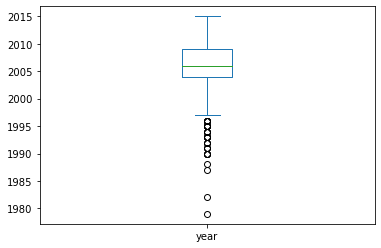

In [44]:
df['year'].plot.box()

<AxesSubplot:>

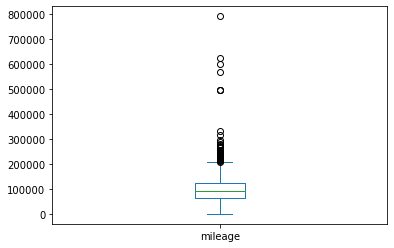

In [45]:
df['mileage'].plot.box()

<AxesSubplot:>

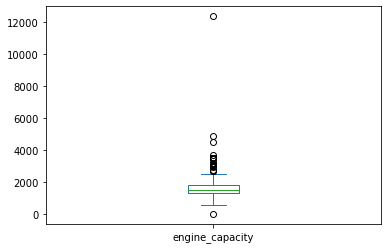

In [46]:
df['engine_capacity'].plot.box()

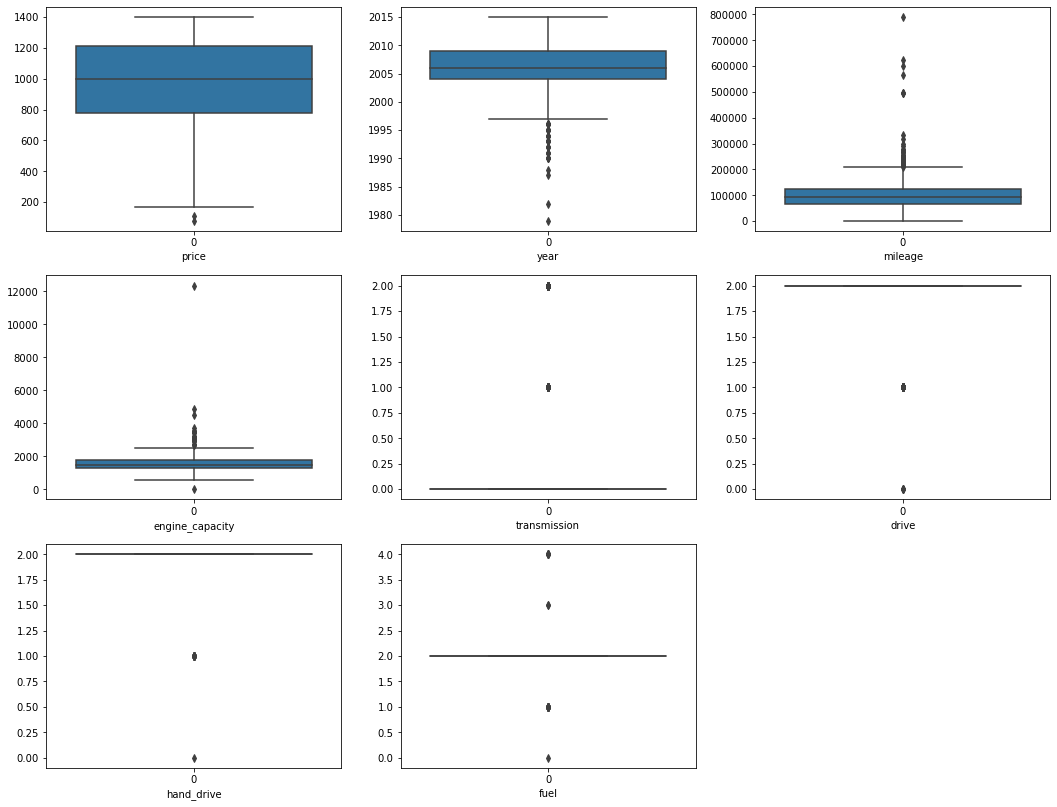

In [47]:
graph=1

plt.figure(figsize=(18,14))

for column in df:
    if graph<=9:
        plt.subplot(3,3,graph)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column)
    graph+=1
plt.show()

Continous variable are having outliers,target variable also have outliers but we will not remove them.


# Removing outliers

In [51]:
z = zscore(df[['year', 'mileage','engine_capacity']])
abs_z = np.abs(z)

filtering_entry = (abs_z < 3).all(axis=1)
df = df[filtering_entry]

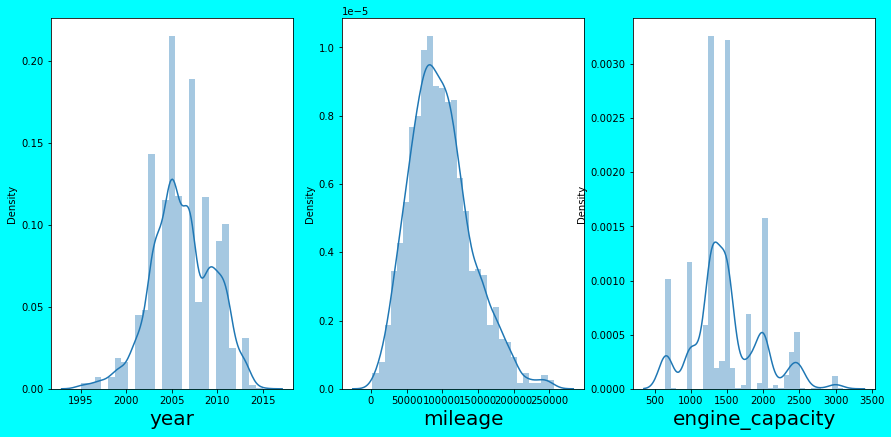

In [52]:
# Let's see how data is distributed for every column

plt.figure(figsize=(20,15), facecolor='cyan')
plotnumber = 1

for column in df[['year', 'mileage','engine_capacity']]:
    if plotnumber <=8:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber += 1
plt.show()

In [57]:
df.shape

(2263, 8)

In [53]:
data_loss = ((2299 - 2244)/2299) * 100
data_loss

2.3923444976076556

Here we lost 2% of data which is acceptable.

# Data Standardization

In [59]:
# x contains all independent features and y contains target variable

x = df.drop('price',axis=1)
y = df['price']

In [60]:
scaler=StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.93405553, -0.41107472, -0.54248726, ...,  0.29085516,
         0.08168597,  0.02419814],
       [ 1.1511155 , -1.03564336, -0.62864938, ...,  0.29085516,
         0.08168597,  0.02419814],
       [-0.33829238, -1.15847519,  1.09459303, ...,  0.29085516,
         0.08168597,  0.02419814],
       ...,
       [-0.33829238,  0.07470089, -1.79183801, ...,  0.29085516,
         0.08168597,  0.02419814],
       [-1.82770026,  1.67082074, -1.79183801, ..., -3.24788264,
         0.08168597,  0.02419814],
       [-0.33829238, -0.5887298 ,  3.24864605, ...,  0.29085516,
         0.08168597,  0.02419814]])

# Model Building

In [61]:
# Linear Regression

lr = LinearRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is: ,{r2_score(y_train,pred_train)}")   
    
    print(f"At random state {i}, the testing accuracy is , {r2_score(y_test,pred_test)}")  
    print("\n")

At random state 0, the training accuracy is: ,0.06471861529526712
At random state 0, the testing accuracy is , 0.08608128277815419


At random state 1, the training accuracy is: ,0.07641304758565182
At random state 1, the testing accuracy is , 0.044818158523437956


At random state 2, the training accuracy is: ,0.07119557045281144
At random state 2, the testing accuracy is , 0.07008925412383482


At random state 3, the training accuracy is: ,0.07323936255025365
At random state 3, the testing accuracy is , 0.05973022344406265


At random state 4, the training accuracy is: ,0.07849496448658644
At random state 4, the testing accuracy is , 0.038869910667139185


At random state 5, the training accuracy is: ,0.058880141870332414
At random state 5, the testing accuracy is , 0.11699688936930164


At random state 6, the training accuracy is: ,0.07900759743330299
At random state 6, the testing accuracy is , 0.03531312142061804


At random state 7, the training accuracy is: ,0.07215323673558038


In [62]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=62)
lr.fit(x_train,y_train)
pred_test = lr.predict(x_test)
print(r2_score(y_test,pred_test))

0.07916743555280392
